<a href="https://colab.research.google.com/github/HafizAQ/DL_Practices/blob/main/Impe_NN_from_Scratch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Courtesy: https://medium.com/intuitively-and-exhaustively-explained/neural-networks-intuitively-and-exhaustively-explained-0153f85c1007



In [1]:
#Simple Structure of the Neural Network

import numpy as np

class SimpleNN:
    def __init__(self, architecture):
        self.architecture = architecture
        self.weights = []
        self.biases = []

        # Initialize weights and biases
        np.random.seed(99)
        for i in range(len(architecture) - 1):
            self.weights.append(np.random.uniform(
                low=-1, high=1,
                size=(architecture[i], architecture[i+1])
            ))
            self.biases.append(np.zeros((1, architecture[i+1])))

architecture = [2, 64, 64, 64, 1]  # Two inputs, two hidden layers, one output
model = SimpleNN(architecture)

print('weight dimensions:')
for w in model.weights:
    print(w.shape)

print('\nbias dimensions:')
for b in model.biases:
    print(b.shape)

weight dimensions:
(2, 64)
(64, 64)
(64, 64)
(64, 1)

bias dimensions:
(1, 64)
(1, 64)
(1, 64)
(1, 1)


In [2]:
"""Implementing the Forward Pass
"""

import numpy as np

class SimpleNN:
    def __init__(self, architecture):
        self.architecture = architecture
        self.weights = []
        self.biases = []

        # Initialize weights and biases
        np.random.seed(99)
        for i in range(len(architecture) - 1):
            self.weights.append(np.random.uniform(
                low=-1, high=1,
                size=(architecture[i], architecture[i+1])
            ))
            self.biases.append(np.zeros((1, architecture[i+1])))

    @staticmethod
    def relu(x):
        #implementing the relu activation function
        return np.maximum(0, x)

    def forward(self, X):
        #iterating through all layers
        for W, b in zip(self.weights, self.biases):

            #applying the weight and bias of the layer
            X = np.dot(X, W) + b

            #doing ReLU for all but the last layer
            if W is not self.weights[-1]:
                X = self.relu(X)

        #returning the result
        return X

    def predict(self, X):
        y = self.forward(X)
        return y.flatten()

#defining a model
architecture = [2, 64, 64, 64, 1]  # Two inputs, two hidden layers, one output
model = SimpleNN(architecture)

# Generate predictions
prediction = model.predict(np.array([0.1,0.2]))
print(prediction)

[-0.21796983]


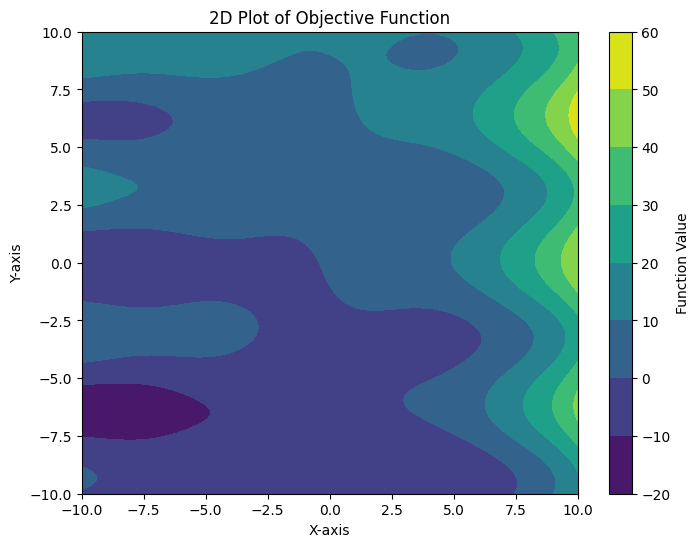

In [3]:
"""Defining what we want the model to learn
"""
import numpy as np
import matplotlib.pyplot as plt

# Define a random function with two inputs
def random_function(x, y):
    return (np.sin(x) + x * np.cos(y) + y + 3**(x/3))

# Generate a grid of x and y values
x = np.linspace(-10, 10, 100)
y = np.linspace(-10, 10, 100)
X, Y = np.meshgrid(x, y)

# Compute the output of the random function
Z = random_function(X, Y)

# Create a 2D plot
plt.figure(figsize=(8, 6))
contour = plt.contourf(X, Y, Z, cmap='viridis')
plt.colorbar(contour, label='Function Value')
plt.title('2D Plot of Objective Function')
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.show()

          X         Y          Z
0  0.803787  9.932076  11.291761
1  2.455605  1.699613   4.475367
2 -9.733559  8.866076  17.451796
3  6.533014 -5.433703  10.067652
4 -8.963829 -6.441422 -15.700530


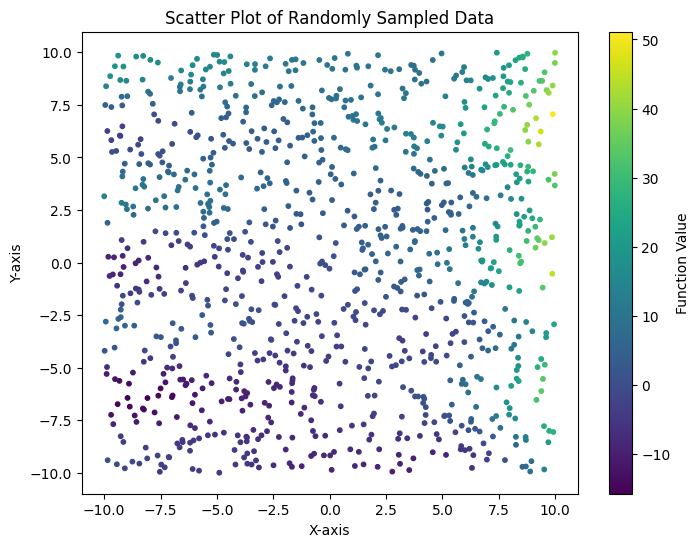

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Define a random function with two inputs
def random_function(x, y):
    return (np.sin(x) + x * np.cos(y) + y + 3**(x/3))

# Define the number of random samples to generate
n_samples = 1000

# Generate random X and Y values within a specified range
x_min, x_max = -10, 10
y_min, y_max = -10, 10

# Generate random values for X and Y
X_random = np.random.uniform(x_min, x_max, n_samples)
Y_random = np.random.uniform(y_min, y_max, n_samples)

# Evaluate the random function at the generated X and Y values
Z_random = random_function(X_random, Y_random)

# Create a dataset
dataset = pd.DataFrame({
    'X': X_random,
    'Y': Y_random,
    'Z': Z_random
})

# Display the dataset
print(dataset.head())

# Create a 2D scatter plot of the sampled data
plt.figure(figsize=(8, 6))
scatter = plt.scatter(dataset['X'], dataset['Y'], c=dataset['Z'], cmap='viridis', s=10)
plt.colorbar(scatter, label='Function Value')
plt.title('Scatter Plot of Randomly Sampled Data')
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.show()

In [5]:
import numpy as np

class SimpleNN:
    def __init__(self, architecture):
        self.architecture = architecture
        self.weights = []
        self.biases = []

        #keeping track of these values in this code block
        #so we can observe them
        self.perceptron_inputs = None
        self.perceptron_outputs = None


        # Initialize weights and biases
        np.random.seed(99)
        for i in range(len(architecture) - 1):
            self.weights.append(np.random.uniform(
                low=-1, high=1,
                size=(architecture[i], architecture[i+1])
            ))
            self.biases.append(np.zeros((1, architecture[i+1])))

    @staticmethod
    def relu(x):
        return np.maximum(0, x)

    def forward(self, X):
        self.perceptron_inputs = [X]
        self.perceptron_outputs = []

        for W, b in zip(self.weights, self.biases):
            Z = np.dot(self.perceptron_inputs[-1], W) + b
            self.perceptron_outputs.append(Z)

            if W is self.weights[-1]:  # Last layer (output)
                A = Z  # Linear output for regression
            else:
                A = self.relu(Z)
            self.perceptron_inputs.append(A)

        return self.perceptron_inputs, self.perceptron_outputs

    def predict(self, X):
        perceptron_inputs, _ = self.forward(X)
        return perceptron_inputs[-1].flatten()

#defining a model
architecture = [2, 64, 64, 64, 1]  # Two inputs, two hidden layers, one output
model = SimpleNN(architecture)

# Generate predictions
prediction = model.predict(np.array([0.1,0.2]))

#looking through critical optimization values
for i, (inpt, outpt) in enumerate(zip(model.perceptron_inputs, model.perceptron_outputs[:-1])):
    print(f'layer {i}')
    print(f'input: {inpt.shape}')
    print(f'output: {outpt.shape}')
    print('')

print('Final Output:')
print(model.perceptron_outputs[-1].shape)


layer 0
input: (2,)
output: (1, 64)

layer 1
input: (1, 64)
output: (1, 64)

layer 2
input: (1, 64)
output: (1, 64)

Final Output:
(1, 1)


In [6]:
import numpy as np

class SimpleNN:
    def __init__(self, architecture):
        self.architecture = architecture
        self.weights = []
        self.biases = []

        # Initialize weights and biases
        np.random.seed(99)
        for i in range(len(architecture) - 1):
            self.weights.append(np.random.uniform(
                low=-1, high=1,
                size=(architecture[i], architecture[i+1])
            ))
            self.biases.append(np.zeros((1, architecture[i+1])))

    @staticmethod
    def relu(x):
        return np.maximum(0, x)

    @staticmethod
    def relu_as_weights(x):
        return (x > 0).astype(float)

    def forward(self, X):
        perceptron_inputs = [X]
        perceptron_outputs = []

        for W, b in zip(self.weights, self.biases):
            Z = np.dot(perceptron_inputs[-1], W) + b
            perceptron_outputs.append(Z)

            if W is self.weights[-1]:  # Last layer (output)
                A = Z  # Linear output for regression
            else:
                A = self.relu(Z)
            perceptron_inputs.append(A)

        return perceptron_inputs, perceptron_outputs

    def backward(self, perceptron_inputs, perceptron_outputs, target):
        weight_changes = []
        bias_changes = []

        m = len(target)
        dA = perceptron_inputs[-1] - target.reshape(-1, 1)  # Output layer gradient

        for i in reversed(range(len(self.weights))):
            dZ = dA if i == len(self.weights) - 1 else dA * self.relu_as_weights(perceptron_outputs[i])
            dW = np.dot(perceptron_inputs[i].T, dZ) / m
            db = np.sum(dZ, axis=0, keepdims=True) / m
            weight_changes.append(dW)
            bias_changes.append(db)

            if i > 0:
                dA = np.dot(dZ, self.weights[i].T)

        return list(reversed(weight_changes)), list(reversed(bias_changes))

    def predict(self, X):
        perceptron_inputs, _ = self.forward(X)
        return perceptron_inputs[-1].flatten()

#defining a model
architecture = [2, 64, 64, 64, 1]  # Two inputs, two hidden layers, one output
model = SimpleNN(architecture)

#defining a sample input and target output
input = np.array([[0.1,0.2]])
desired_output = np.array([0.5])

#doing forward and backward pass to calculate changes
perceptron_inputs, perceptron_outputs = model.forward(input)
weight_changes, bias_changes = model.backward(perceptron_inputs, perceptron_outputs, desired_output)

#smaller numbers for printing
np.set_printoptions(precision=2)

for i, (layer_weights, layer_biases, layer_weight_changes, layer_bias_changes)\
in enumerate(zip(model.weights, model.biases, weight_changes, bias_changes)):
    print(f'layer {i}')
    print(f'weight matrix: {layer_weights.shape}')
    print(f'weight matrix changes: {layer_weight_changes.shape}')
    print(f'bias matrix: {layer_biases.shape}')
    print(f'bias matrix changes: {layer_bias_changes.shape}')
    print('')

print('The weight and weight change matrix of the second layer:')
print('weight matrix:')
print(model.weights[1])
print('change matrix:')
print(weight_changes[1])

layer 0
weight matrix: (2, 64)
weight matrix changes: (2, 64)
bias matrix: (1, 64)
bias matrix changes: (1, 64)

layer 1
weight matrix: (64, 64)
weight matrix changes: (64, 64)
bias matrix: (1, 64)
bias matrix changes: (1, 64)

layer 2
weight matrix: (64, 64)
weight matrix changes: (64, 64)
bias matrix: (1, 64)
bias matrix changes: (1, 64)

layer 3
weight matrix: (64, 1)
weight matrix changes: (64, 1)
bias matrix: (1, 1)
bias matrix changes: (1, 1)

The weight and weight change matrix of the second layer:
weight matrix:
[[ 0.41 -0.2   0.24 ... -0.77 -0.7   0.22]
 [ 0.69 -0.13 -0.07 ...  0.95 -0.77 -0.18]
 [ 0.57  0.23  0.41 ...  0.4  -0.45 -0.85]
 ...
 [-0.7  -0.07 -0.31 ... -0.68 -0.01  0.5 ]
 [-0.73 -0.95  0.67 ... -0.32  0.85  0.05]
 [ 0.8   0.24  0.33 ...  0.77 -0.67 -0.77]]
change matrix:
[[ 0.    0.    0.   ...  0.05  0.   -0.07]
 [ 0.    0.    0.   ...  0.    0.    0.  ]
 [ 0.    0.    0.   ...  0.    0.    0.  ]
 ...
 [ 0.    0.    0.   ...  0.03  0.   -0.04]
 [ 0.    0.    0. 

In [9]:
import numpy as np

class SimpleNN:
    def __init__(self, architecture):
        self.architecture = architecture
        self.weights = []
        self.biases = []

        # Initialize weights and biases
        np.random.seed(99)
        for i in range(len(architecture) - 1):
            self.weights.append(np.random.uniform(
                low=-1, high=1,
                size=(architecture[i], architecture[i+1])
            ))
            self.biases.append(np.zeros((1, architecture[i+1])))

    @staticmethod
    def relu(x):
        return np.maximum(0, x)

    @staticmethod
    def relu_as_weights(x):
        return (x > 0).astype(float)

    def forward(self, X):
        perceptron_inputs = [X]
        perceptron_outputs = []

        for W, b in zip(self.weights, self.biases):
            Z = np.dot(perceptron_inputs[-1], W) + b
            perceptron_outputs.append(Z)

            if W is self.weights[-1]:  # Last layer (output)
                A = Z  # Linear output for regression
            else:
                A = self.relu(Z)
            perceptron_inputs.append(A)

        return perceptron_inputs, perceptron_outputs

    def backward(self, perceptron_inputs, perceptron_outputs, y_true):
        weight_changes = []
        bias_changes = []

        m = len(y_true)
        dA = perceptron_inputs[-1] - y_true.reshape(-1, 1)  # Output layer gradient

        for i in reversed(range(len(self.weights))):
            dZ = dA if i == len(self.weights) - 1 else dA * self.relu_as_weights(perceptron_outputs[i])
            dW = np.dot(perceptron_inputs[i].T, dZ) / m
            db = np.sum(dZ, axis=0, keepdims=True) / m
            weight_changes.append(dW)
            bias_changes.append(db)

            if i > 0:
                dA = np.dot(dZ, self.weights[i].T)

        return list(reversed(weight_changes)), list(reversed(bias_changes))

    def update_weights(self, weight_changes, bias_changes, lr):
        for i in range(len(self.weights)):
            self.weights[i] -= lr * weight_changes[i]
            self.biases[i] -= lr * bias_changes[i]

    def train(self, X, y, epochs, lr=0.01):
        for epoch in range(epochs):
            perceptron_inputs, perceptron_outputs = self.forward(X)
            weight_changes, bias_changes = self.backward(perceptron_inputs, perceptron_outputs, y)
            self.update_weights(weight_changes, bias_changes, lr)

            if epoch % 20 == 0 or epoch == epochs - 1:
                loss = np.mean((perceptron_inputs[-1].flatten() - y) ** 2)  # MSE
                print(f"EPOCH {epoch}: Loss = {loss:.4f}")

    def predict(self, X):
        perceptron_inputs, _ = self.forward(X)
        return perceptron_inputs[-1].flatten()


In [10]:
# Flatten the data
X_flat = X.flatten()
Y_flat = Y.flatten()
Z_flat = Z.flatten()

# Stack X and Y as input features
inputs = np.column_stack((X_flat, Y_flat))
outputs = Z_flat

# Normalize the inputs and outputs
inputs_mean = np.mean(inputs, axis=0)
inputs_std = np.std(inputs, axis=0)
outputs_mean = np.mean(outputs)
outputs_std = np.std(outputs)

inputs = (inputs - inputs_mean) / inputs_std
outputs = (outputs - outputs_mean) / outputs_std

In [11]:
# Define the architecture: [input_dim, hidden1, ..., output_dim]
architecture = [2, 64, 64, 64, 1]  # Two inputs, two hidden layers, one output
model = SimpleNN(architecture)

# Train the model
model.train(inputs, outputs, epochs=2000, lr=0.001)

EPOCH 0: Loss = 166.5157
EPOCH 20: Loss = 2.5053
EPOCH 40: Loss = 1.1687
EPOCH 60: Loss = 0.8406
EPOCH 80: Loss = 0.6814
EPOCH 100: Loss = 0.5828
EPOCH 120: Loss = 0.5140
EPOCH 140: Loss = 0.4636
EPOCH 160: Loss = 0.4257
EPOCH 180: Loss = 0.3959
EPOCH 200: Loss = 0.3719
EPOCH 220: Loss = 0.3521
EPOCH 240: Loss = 0.3351
EPOCH 260: Loss = 0.3203
EPOCH 280: Loss = 0.3071
EPOCH 300: Loss = 0.2952
EPOCH 320: Loss = 0.2844
EPOCH 340: Loss = 0.2745
EPOCH 360: Loss = 0.2653
EPOCH 380: Loss = 0.2568
EPOCH 400: Loss = 0.2489
EPOCH 420: Loss = 0.2415
EPOCH 440: Loss = 0.2346
EPOCH 460: Loss = 0.2281
EPOCH 480: Loss = 0.2222
EPOCH 500: Loss = 0.2166
EPOCH 520: Loss = 0.2113
EPOCH 540: Loss = 0.2064
EPOCH 560: Loss = 0.2017
EPOCH 580: Loss = 0.1973
EPOCH 600: Loss = 0.1931
EPOCH 620: Loss = 0.1891
EPOCH 640: Loss = 0.1854
EPOCH 660: Loss = 0.1818
EPOCH 680: Loss = 0.1783
EPOCH 700: Loss = 0.1750
EPOCH 720: Loss = 0.1718
EPOCH 740: Loss = 0.1688
EPOCH 760: Loss = 0.1659
EPOCH 780: Loss = 0.1631
EPOC

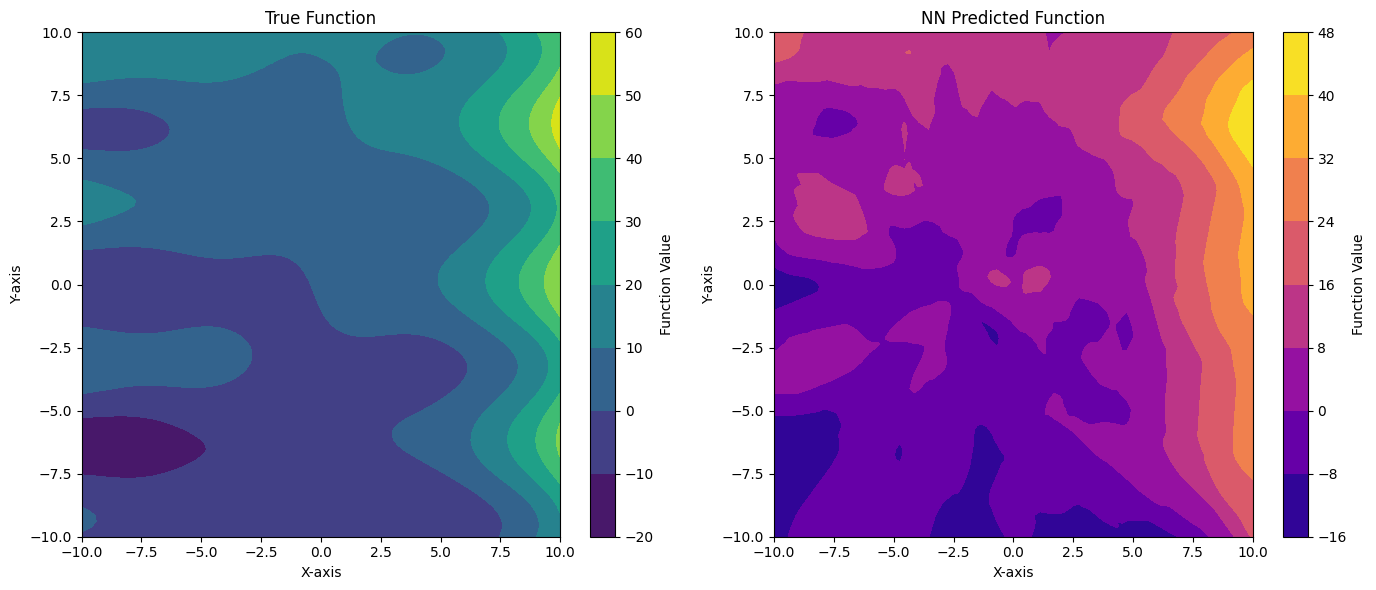

In [12]:
import matplotlib.pyplot as plt

# Reshape predictions to grid format for visualization
Z_pred = model.predict(inputs) * outputs_std + outputs_mean
Z_pred = Z_pred.reshape(X.shape)

# Plot comparison of the true function and the model predictions
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Plot the true function
axes[0].contourf(X, Y, Z, cmap='viridis')
axes[0].set_title("True Function")
axes[0].set_xlabel("X-axis")
axes[0].set_ylabel("Y-axis")
axes[0].colorbar = plt.colorbar(axes[0].contourf(X, Y, Z, cmap='viridis'), ax=axes[0], label="Function Value")

# Plot the predicted function
axes[1].contourf(X, Y, Z_pred, cmap='plasma')
axes[1].set_title("NN Predicted Function")
axes[1].set_xlabel("X-axis")
axes[1].set_ylabel("Y-axis")
axes[1].colorbar = plt.colorbar(axes[1].contourf(X, Y, Z_pred, cmap='plasma'), ax=axes[1], label="Function Value")

plt.tight_layout()
plt.show()

In [ ]:
# Define the architecture: [input_dim, hidden1, ..., output_dim]
architecture = [2, 64, 64, 64, 1]  # Two inputs, two hidden layers, one output
model = SimpleNN(architecture)

# Train the model
model.train(inputs, outputs, epochs=2000, lr=0.001)

EPOCH 0: Loss = 166.5157
EPOCH 20: Loss = 2.5053
EPOCH 40: Loss = 1.1687
EPOCH 60: Loss = 0.8406
EPOCH 80: Loss = 0.6814
EPOCH 100: Loss = 0.5828
EPOCH 120: Loss = 0.5140
EPOCH 140: Loss = 0.4636
EPOCH 160: Loss = 0.4257
EPOCH 180: Loss = 0.3959
EPOCH 200: Loss = 0.3719
EPOCH 220: Loss = 0.3521
EPOCH 240: Loss = 0.3351
EPOCH 260: Loss = 0.3203
EPOCH 280: Loss = 0.3071
EPOCH 300: Loss = 0.2952
EPOCH 320: Loss = 0.2844
EPOCH 340: Loss = 0.2745
EPOCH 360: Loss = 0.2653
EPOCH 380: Loss = 0.2568
EPOCH 400: Loss = 0.2489
EPOCH 420: Loss = 0.2415
EPOCH 440: Loss = 0.2346
EPOCH 460: Loss = 0.2281
EPOCH 480: Loss = 0.2222
EPOCH 500: Loss = 0.2166
EPOCH 520: Loss = 0.2113
EPOCH 540: Loss = 0.2064
EPOCH 560: Loss = 0.2017
EPOCH 580: Loss = 0.1973
EPOCH 600: Loss = 0.1931
EPOCH 620: Loss = 0.1891
EPOCH 640: Loss = 0.1854
EPOCH 660: Loss = 0.1818
EPOCH 680: Loss = 0.1783
EPOCH 700: Loss = 0.1750
EPOCH 720: Loss = 0.1718
EPOCH 740: Loss = 0.1688
EPOCH 760: Loss = 0.1659
EPOCH 780: Loss = 0.1631
EPOC